In [ ]:
!unzip '/content/solar_radiation_prediction_ai_challenge-dataset.zip'

Archive:  /content/solar_radiation_prediction_ai_challenge-dataset.zip
  inflating: sample_submission.csv   
  inflating: TEST.csv                
  inflating: TRAIN.csv               


In [ ]:
import numpy as np
import pandas as pd

import re
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb

from sklearn.metrics import r2_score

In [ ]:
data1 = pd.read_csv('TRAIN.csv')
data1.drop(columns=['idx'], inplace=True)
data1

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1480107904,11/25/2016 12:00:00 AM,11:05:04,288.44,46,30.48,101,129.84,13.50,06:37:00,17:42:00
1,1472818508,9/2/2016 12:00:00 AM,02:15:08,2.79,50,30.42,75,173.90,6.75,06:07:00,18:37:00
2,1475804719,10/6/2016 12:00:00 AM,15:45:19,118.05,54,30.42,100,7.35,1.12,06:15:00,18:07:00
3,1482533149,12/23/2016 12:00:00 AM,12:45:49,853.17,58,30.44,57,81.67,11.25,06:54:00,17:50:00
4,1481883019,12/16/2016 12:00:00 AM,00:10:19,1.24,42,30.24,103,171.13,2.25,06:50:00,17:46:00
...,...,...,...,...,...,...,...,...,...,...,...
26144,1479968101,11/23/2016 12:00:00 AM,20:15:01,1.20,45,30.46,98,129.17,5.62,06:36:00,17:42:00
26145,1475761224,10/6/2016 12:00:00 AM,03:40:24,1.27,47,30.43,95,194.87,6.75,06:15:00,18:07:00
26146,1476618020,10/16/2016 12:00:00 AM,01:40:20,1.22,49,30.50,24,185.06,6.75,06:18:00,17:59:00
26147,1473947404,9/15/2016 12:00:00 AM,03:50:04,1.25,49,30.41,92,122.89,1.12,06:10:00,18:26:00


In [ ]:
data2 = pd.read_csv('SolarPrediction.csv')
data2

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


In [ ]:
dataset = data1.append(data2, ignore_index=True, sort=False)
dataset.drop_duplicates()
dataset

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1480107904,11/25/2016 12:00:00 AM,11:05:04,288.44,46,30.48,101,129.84,13.50,06:37:00,17:42:00
1,1472818508,9/2/2016 12:00:00 AM,02:15:08,2.79,50,30.42,75,173.90,6.75,06:07:00,18:37:00
2,1475804719,10/6/2016 12:00:00 AM,15:45:19,118.05,54,30.42,100,7.35,1.12,06:15:00,18:07:00
3,1482533149,12/23/2016 12:00:00 AM,12:45:49,853.17,58,30.44,57,81.67,11.25,06:54:00,17:50:00
4,1481883019,12/16/2016 12:00:00 AM,00:10:19,1.24,42,30.24,103,171.13,2.25,06:50:00,17:46:00
...,...,...,...,...,...,...,...,...,...,...,...
58830,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
58831,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
58832,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
58833,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [ ]:
dataset['DewPoint'] = list(x for x in range(len(dataset)))
for i in range(len(dataset)):
  Td = dataset.Temperature[i] - ((100 - dataset.Humidity[i])/5.0)
  dataset['DewPoint'][i] = Td
dataset

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,DewPoint
0,1480107904,11/25/2016 12:00:00 AM,11:05:04,288.44,46,30.48,101,129.84,13.50,06:37:00,17:42:00,46
1,1472818508,9/2/2016 12:00:00 AM,02:15:08,2.79,50,30.42,75,173.90,6.75,06:07:00,18:37:00,45
2,1475804719,10/6/2016 12:00:00 AM,15:45:19,118.05,54,30.42,100,7.35,1.12,06:15:00,18:07:00,54
3,1482533149,12/23/2016 12:00:00 AM,12:45:49,853.17,58,30.44,57,81.67,11.25,06:54:00,17:50:00,49
4,1481883019,12/16/2016 12:00:00 AM,00:10:19,1.24,42,30.24,103,171.13,2.25,06:50:00,17:46:00,42
...,...,...,...,...,...,...,...,...,...,...,...,...
58830,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00,44
58831,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00,44
58832,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00,44
58833,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00,44


In [ ]:
from datetime import datetime
from pytz import timezone
import pytz
hawaii= timezone('Pacific/Honolulu')
dataset.index =  pd.to_datetime(dataset['UNIXTime'], unit='s')
dataset.index = dataset.index.tz_localize(pytz.utc).tz_convert(hawaii)
dataset['MonthOfYear'] = dataset.index.strftime('%m').astype(int)
dataset['DayOfYear'] = dataset.index.strftime('%j').astype(int)
dataset['WeekOfYear'] = dataset.index.strftime('%U').astype(int)
dataset['TimeOfDay(h)'] = dataset.index.hour
dataset['TimeOfDay(m)'] = dataset.index.hour*60 + dataset.index.minute
dataset['TimeOfDay(s)'] = dataset.index.hour*60*60 + dataset.index.minute*60 + dataset.index.second
dataset['TimeSunRise'] = pd.to_datetime(dataset['TimeSunRise'], format='%H:%M:%S')
dataset['TimeSunSet'] = pd.to_datetime(dataset['TimeSunSet'], format='%H:%M:%S')
dataset['DayLength(s)'] = dataset['TimeSunSet'].dt.hour*60*60 \
                           + dataset['TimeSunSet'].dt.minute*60 \
                           + dataset['TimeSunSet'].dt.second \
                           - dataset['TimeSunRise'].dt.hour*60*60 \
                           - dataset['TimeSunRise'].dt.minute*60 \
                           - dataset['TimeSunRise'].dt.second
dataset.drop(['Data','Time','TimeSunRise','TimeSunSet'], inplace=True, axis=1)
dataset

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,DewPoint,MonthOfYear,DayOfYear,WeekOfYear,TimeOfDay(h),TimeOfDay(m),TimeOfDay(s),DayLength(s)
UNIXTime,,,,,,,,,,,,,,,
2016-11-25 11:05:04-10:00,1480107904,288.44,46,30.48,101,129.84,13.50,46,11,330,47,11,665,39904,39900
2016-09-02 02:15:08-10:00,1472818508,2.79,50,30.42,75,173.90,6.75,45,9,246,35,2,135,8108,45000
2016-10-06 15:45:19-10:00,1475804719,118.05,54,30.42,100,7.35,1.12,54,10,280,40,15,945,56719,42720
2016-12-23 12:45:49-10:00,1482533149,853.17,58,30.44,57,81.67,11.25,49,12,358,51,12,765,45949,39360
2016-12-16 00:10:19-10:00,1481883019,1.24,42,30.24,103,171.13,2.25,42,12,351,50,0,10,619,39360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-01 00:20:04-10:00,1480587604,1.22,44,30.43,102,145.42,6.75,44,12,336,48,0,20,1204,39660
2016-12-01 00:15:01-10:00,1480587301,1.17,44,30.42,102,117.78,6.75,44,12,336,48,0,15,901,39660
2016-12-01 00:10:01-10:00,1480587001,1.20,44,30.42,102,145.19,9.00,44,12,336,48,0,10,601,39660


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 58835 entries, 2016-11-25 11:05:04-10:00 to 2016-12-01 00:00:02-10:00
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                58835 non-null  int64  
 1   Radiation               58835 non-null  float64
 2   Temperature             58835 non-null  int64  
 3   Pressure                58835 non-null  float64
 4   Humidity                58835 non-null  int64  
 5   WindDirection(Degrees)  58835 non-null  float64
 6   Speed                   58835 non-null  float64
 7   DewPoint                58835 non-null  int64  
 8   MonthOfYear             58835 non-null  int64  
 9   DayOfYear               58835 non-null  int64  
 10  WeekOfYear              58835 non-null  int64  
 11  TimeOfDay(h)            58835 non-null  int64  
 12  TimeOfDay(m)            58835 non-null  int64  
 13  TimeOfDay(s)            58835 non-null  int6

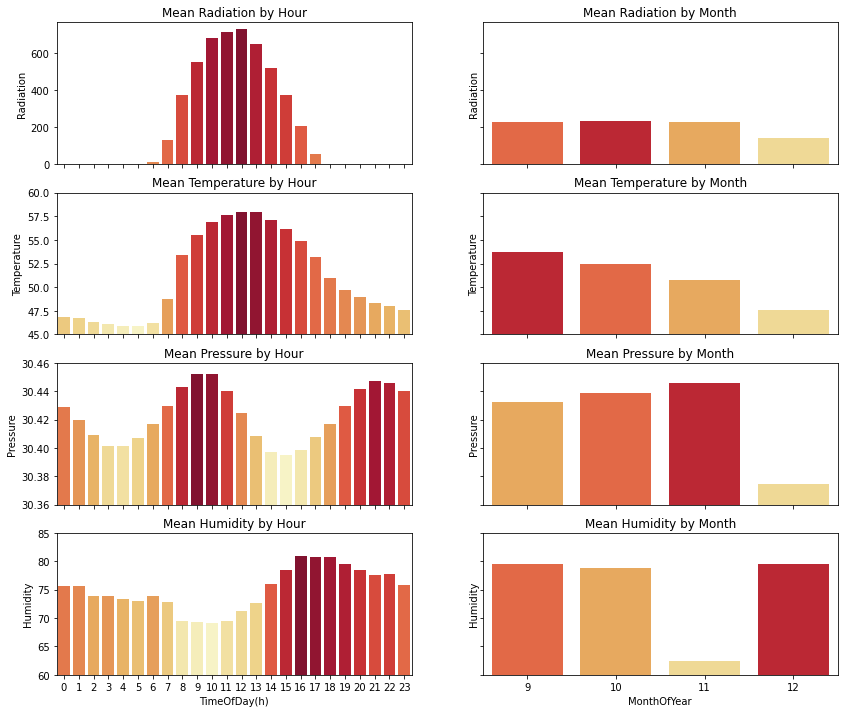

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
grouped_m=dataset.groupby('MonthOfYear').mean().reset_index()
grouped_w=dataset.groupby('WeekOfYear').mean().reset_index()
grouped_d=dataset.groupby('DayOfYear').mean().reset_index()
grouped_h=dataset.groupby('TimeOfDay(h)').mean().reset_index()

f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, sharex='col', sharey='row', figsize=(14,12))
ax3.set_ylim(45,60)
ax5.set_ylim(30.36,30.46)
ax7.set_ylim(60,85)

ax1.set_title('Mean Radiation by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Radiation'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='Radiation', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax1)
ax1.set_xlabel('')

ax2.set_title('Mean Radiation by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Radiation'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Radiation', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax2)
ax2.set_xlabel('')

ax3.set_title('Mean Temperature by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Temperature'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='Temperature', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax3)
ax3.set_xlabel('')

ax4.set_title('Mean Temperature by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Temperature'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Temperature', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax4)
ax4.set_xlabel('')

ax5.set_title('Mean Pressure by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Pressure'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='Pressure', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax5)
ax5.set_xlabel('')

ax6.set_title('Mean Pressure by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Pressure'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Pressure', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax6)
ax6.set_xlabel('')

ax7.set_title('Mean Humidity by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Humidity'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='Humidity', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax7)

ax8.set_title('Mean Humidity by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Humidity'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Humidity', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax8)

plt.show()

In [ ]:
dataset

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,DewPoint,MonthOfYear,DayOfYear,WeekOfYear,TimeOfDay(h),TimeOfDay(m),TimeOfDay(s),DayLength(s)
UNIXTime,,,,,,,,,,,,,,,
2016-11-25 11:05:04-10:00,1480107904,288.44,46,30.48,101,129.84,13.50,46,11,330,47,11,665,39904,39900
2016-09-02 02:15:08-10:00,1472818508,2.79,50,30.42,75,173.90,6.75,45,9,246,35,2,135,8108,45000
2016-10-06 15:45:19-10:00,1475804719,118.05,54,30.42,100,7.35,1.12,54,10,280,40,15,945,56719,42720
2016-12-23 12:45:49-10:00,1482533149,853.17,58,30.44,57,81.67,11.25,49,12,358,51,12,765,45949,39360
2016-12-16 00:10:19-10:00,1481883019,1.24,42,30.24,103,171.13,2.25,42,12,351,50,0,10,619,39360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-01 00:20:04-10:00,1480587604,1.22,44,30.43,102,145.42,6.75,44,12,336,48,0,20,1204,39660
2016-12-01 00:15:01-10:00,1480587301,1.17,44,30.42,102,117.78,6.75,44,12,336,48,0,15,901,39660
2016-12-01 00:10:01-10:00,1480587001,1.20,44,30.42,102,145.19,9.00,44,12,336,48,0,10,601,39660


In [ ]:
tradata = dataset

In [ ]:
y = dataset['Radiation']
X = dataset.drop(['Radiation'], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,5]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 5], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
regressor = RandomForestRegressor()

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = regressor, param_grid = param_grid, cv = 3, verbose=2, n_jobs = -1)

In [ ]:
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   47.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed: 29.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 10}

In [ ]:
print (f'Train Accuracy - : {rf_Grid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test):.3f}')

Train Accuracy - : 0.852
Test Accuracy - : 0.842


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
regressor = RandomForestRegressor(n_estimators = 10)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
accuracies = cross_val_score(estimator = regressor, X = X_train,y = y_train, cv = 10, scoring = 'r2')
accuracy = accuracies.mean()
print('r2 = {}'.format(accuracy))

r2 = 0.9696332225657198


In [ ]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
y_pred = regressor.predict(X_test)
explained_variance_score = explained_variance_score(y_test, y_pred)
mean_squared_error = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('explained variance = {}'.format(explained_variance_score))
print('mse = {}'.format(mean_squared_error))
print('r2 = {}'.format(r_squared))

explained variance = 0.9717683697207351
mse = 2798.652026058384
r2 = 0.9717613545928253


In [ ]:
df = pd.read_csv('TEST.csv')
df

,idx,UNIXTime,Data,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,0,1482775250,12/26/2016 12:00:00 AM,08:00:50,48,30.47,101,187.78,4.50,06:55:00,17:51:00
1,1,1482774940,12/26/2016 12:00:00 AM,07:55:40,48,30.47,101,133.40,10.12,06:55:00,17:51:00
2,2,1482774649,12/26/2016 12:00:00 AM,07:50:49,48,30.47,101,160.69,5.62,06:55:00,17:51:00
3,3,1482774351,12/26/2016 12:00:00 AM,07:45:51,48,30.47,101,144.56,7.87,06:55:00,17:51:00
4,4,1482774039,12/26/2016 12:00:00 AM,07:40:39,48,30.47,101,169.05,10.12,06:55:00,17:51:00
...,...,...,...,...,...,...,...,...,...,...,...
6532,6532,1480587604,12/1/2016 12:00:00 AM,00:20:04,44,30.43,102,145.42,6.75,06:41:00,17:42:00
6533,6533,1480587301,12/1/2016 12:00:00 AM,00:15:01,44,30.42,102,117.78,6.75,06:41:00,17:42:00
6534,6534,1480587001,12/1/2016 12:00:00 AM,00:10:01,44,30.42,102,145.19,9.00,06:41:00,17:42:00
6535,6535,1480586702,12/1/2016 12:00:00 AM,00:05:02,44,30.42,101,164.19,7.87,06:41:00,17:42:00


In [ ]:
from datetime import datetime
from pytz import timezone
import pytz
hawaii= timezone('Pacific/Honolulu')
df.index =  pd.to_datetime(df['UNIXTime'], unit='s')
df.index = df.index.tz_localize(pytz.utc).tz_convert(hawaii)
df['MonthOfYear'] = df.index.strftime('%m').astype(int)
df['DayOfYear'] = df.index.strftime('%j').astype(int)
df['WeekOfYear'] = df.index.strftime('%U').astype(int)
df['TimeOfDay(h)'] = df.index.hour
df['TimeOfDay(m)'] = df.index.hour*60 + df.index.minute
df['TimeOfDay(s)'] = df.index.hour*60*60 + df.index.minute*60 + df.index.second
df['TimeSunRise'] = pd.to_datetime(df['TimeSunRise'], format='%H:%M:%S')
df['TimeSunSet'] = pd.to_datetime(df['TimeSunSet'], format='%H:%M:%S')
df['DayLength(s)'] = df['TimeSunSet'].dt.hour*60*60 \
                           + df['TimeSunSet'].dt.minute*60 \
                           + df['TimeSunSet'].dt.second \
                           - df['TimeSunRise'].dt.hour*60*60 \
                           - df['TimeSunRise'].dt.minute*60 \
                           - df['TimeSunRise'].dt.second
df.drop(['Data','Time','TimeSunRise','TimeSunSet'], inplace=True, axis=1)
df.head()

,idx,UNIXTime,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,MonthOfYear,DayOfYear,WeekOfYear,TimeOfDay(h),TimeOfDay(m),TimeOfDay(s),DayLength(s)
UNIXTime,,,,,,,,,,,,,,
2016-12-26 08:00:50-10:00,0,1482775250,48,30.47,101,187.78,4.50,12,361,52,8,480,28850,39360
2016-12-26 07:55:40-10:00,1,1482774940,48,30.47,101,133.40,10.12,12,361,52,7,475,28540,39360
2016-12-26 07:50:49-10:00,2,1482774649,48,30.47,101,160.69,5.62,12,361,52,7,470,28249,39360
2016-12-26 07:45:51-10:00,3,1482774351,48,30.47,101,144.56,7.87,12,361,52,7,465,27951,39360
2016-12-26 07:40:39-10:00,4,1482774039,48,30.47,101,169.05,10.12,12,361,52,7,460,27639,39360


In [ ]:
df['DewPoint'] = list(x for x in range(len(df)))
for i in range(len(df)):
  Td = df.Temperature[i] - ((100 - df.Humidity[i])/5.0)
  df['DewPoint'][i] = Td
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,idx,UNIXTime,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,MonthOfYear,DayOfYear,WeekOfYear,TimeOfDay(h),TimeOfDay(m),TimeOfDay(s),DayLength(s),DewPoint
UNIXTime,,,,,,,,,,,,,,,
2016-12-26 08:00:50-10:00,0,1482775250,48,30.47,101,187.78,4.50,12,361,52,8,480,28850,39360,48
2016-12-26 07:55:40-10:00,1,1482774940,48,30.47,101,133.40,10.12,12,361,52,7,475,28540,39360,48
2016-12-26 07:50:49-10:00,2,1482774649,48,30.47,101,160.69,5.62,12,361,52,7,470,28249,39360,48
2016-12-26 07:45:51-10:00,3,1482774351,48,30.47,101,144.56,7.87,12,361,52,7,465,27951,39360,48
2016-12-26 07:40:39-10:00,4,1482774039,48,30.47,101,169.05,10.12,12,361,52,7,460,27639,39360,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-01 00:20:04-10:00,6532,1480587604,44,30.43,102,145.42,6.75,12,336,48,0,20,1204,39660,44
2016-12-01 00:15:01-10:00,6533,1480587301,44,30.42,102,117.78,6.75,12,336,48,0,15,901,39660,44
2016-12-01 00:10:01-10:00,6534,1480587001,44,30.42,102,145.19,9.00,12,336,48,0,10,601,39660,44


In [ ]:
testdf = df
testdf.drop(columns={'idx'},inplace=True)
testdf

,UNIXTime,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,MonthOfYear,DayOfYear,WeekOfYear,TimeOfDay(h),TimeOfDay(m),TimeOfDay(s),DayLength(s),DewPoint
UNIXTime,,,,,,,,,,,,,,
2016-12-26 08:00:50-10:00,1482775250,48,30.47,101,187.78,4.50,12,361,52,8,480,28850,39360,48
2016-12-26 07:55:40-10:00,1482774940,48,30.47,101,133.40,10.12,12,361,52,7,475,28540,39360,48
2016-12-26 07:50:49-10:00,1482774649,48,30.47,101,160.69,5.62,12,361,52,7,470,28249,39360,48
2016-12-26 07:45:51-10:00,1482774351,48,30.47,101,144.56,7.87,12,361,52,7,465,27951,39360,48
2016-12-26 07:40:39-10:00,1482774039,48,30.47,101,169.05,10.12,12,361,52,7,460,27639,39360,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-01 00:20:04-10:00,1480587604,44,30.43,102,145.42,6.75,12,336,48,0,20,1204,39660,44
2016-12-01 00:15:01-10:00,1480587301,44,30.42,102,117.78,6.75,12,336,48,0,15,901,39660,44
2016-12-01 00:10:01-10:00,1480587001,44,30.42,102,145.19,9.00,12,336,48,0,10,601,39660,44


In [ ]:
pred = regressor.predict(testdf)
pred

ValueError: ignored

In [ ]:
df2=pd.DataFrame()
result=list(pred)
df2['idx']=list(x for x in range(len(testdf)))
df2['Radiation']=list(x for x in result)
df2

,idx,Radiation
0,0,86.0139
1,1,79.2738
2,2,75.5472
3,3,66.4942
4,4,56.7737
...,...,...
6532,6532,1.2177
6533,6533,1.1739
6534,6534,1.2009
6535,6535,1.2252


In [ ]:
df2.to_csv('solar.csv',index=False)

In [ ]:
from sklearn.model_selection import train_test_split

X=dataset[['Temperature', 'Pressure', 'Humidity', 'Speed','DewPoint','WindDirection(Degrees)','MonthOfYear','TimeOfDay(h)']]


Y=dataset.Radiation

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, random_state= 0)

X1=dataset[['Temperature', 'Pressure', 'Humidity', 'Speed','DewPoint','WindDirection(Degrees)','MonthOfYear','TimeOfDay(h)']]


Y1=dataset.Radiation

X1_train, X1_test, Y1_train, Y1_test= train_test_split(X1, Y1, random_state= 0)

def model_score_error(model):
    prepared_model=model.fit(X1_train, Y1_train)
    x=prepared_model.score(X1_test,Y1_test)
    print('Score: ',x)
    Target_predicted=prepared_model.predict(X1_test)
    return Target_predicted

In [ ]:
from sklearn.neural_network import MLPRegressor

MLP = MLPRegressor(activation='relu', alpha=10, batch_size=150, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(500,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

outpu=model_score_error(MLP)

Score:  0.8780765710537944


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =5)
prepared_model=GBoost.fit(X_train, Y_train)

In [ ]:
x=prepared_model.score(X_test,Y_test)
print('Score: ',x)
Target=prepared_model.predict(X_test)

Score:  0.9125831279493618


In [ ]:
rms = sqrt(mean_squared_error(Y_test, Target))


In [ ]:
rms


93.23096190268714